In [ ]:
# %%

import torch
import torch.nn as nn
from torch.nn import functional as F
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import numpy as np
from matplotlib import pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# %%

#loading MNIST
train_data = dsets.MNIST(root = '/Users/aaronhillman/Desktop/data', train = True,transform = transforms.ToTensor(),
                   download = True)
test_data = dsets.MNIST(root = '/Users/aaronhillman/Deskstop/data', train = False,transform = transforms.ToTensor(),
                   download = True)

In [ ]:
# %%

Xtr = torch.stack([x[0].view((28*28,)) for x in train_data]).to(device)
Ytr = torch.tensor([x[1] for x in train_data]).to(device)
Xte = torch.stack([x[0].view((28*28,)) for x in test_data]).to(device)
Yte = torch.tensor([x[1] for x in test_data]).to(device)

In [ ]:
# %%

#setup the model
class MLP(nn.Module):

    def __init__(self, width):
        super().__init__()
        self.width = width
        self.net = nn.Sequential( nn.Linear(28*28, width), nn.ReLU(), nn.Linear(width, 10))

    

    def forward(self, x_batch, y_batch = None):
        x_out = self.net(x_batch)
        if y_batch is None:
            loss = None
        else:
            loss = F.cross_entropy(x_out, y_batch)

        return x_out, loss

In [ ]:
#%%

def MLP_param_count(MLPwidth):
    m = MLP(MLPwidth).to(device)
    param_count = 0
    for p in m.parameters():
        param_count += p.numel()

    return param_count

In [ ]:
# %%

MLP_sizes = []
MLP_losses = []

for model_size in torch.logspace(1.5, 4, 50):
    
    MLP_sizes.append(MLP_param_count(int(model_size)))

    m = MLP(int(model_size)).to(device) #create the model
    print(int(model_size))

    optimizer = torch.optim.AdamW(m.parameters(), lr = 1e-4)

    xloss = []
    yloss = []
    running_loss = 0
    B = 64

    for i in range(10000):
        rand_inds = torch.randint(0, len(Xtr), (B,))
        Xb, Yb = Xtr[rand_inds], Ytr[rand_inds]
        out_probs, loss = m.forward(Xb, Yb)

        optimizer.zero_grad(set_to_none = True)

        loss.backward()
        optimizer.step()

        running_loss += loss

        if i%200 == 0:
            xloss.append(i)
            yloss.append(running_loss/200)
            running_loss = 0
    
    MLP_losses.append(yloss[-1].item())
            
with open("MLPsizes_cuda.txt", "w") as f:
    np.savetxt(f, MLP_sizes)

with open("MLPlosses_cuda.txt", "w") as f:
    np.savetxt(f, MLP_losses)


"""Now the CNN"""

31
35
39
44
50
56
63
71
80
91
102
115
129
145
163
184
207
232
262
294
331
372
419
471
530
596
670
754
848
954
1073
1206
1357
1526
1716
1930
2171
2442
2746
3088
3473
3906
4393
4941
5557
6250
7029
7906
8891
10000


'Now the CNN'

In [ ]:
#%%

Xtr = torch.stack([x[0] for x in train_data]).to(device)
Ytr = torch.tensor([x[1] for x in train_data]).to(device)
Xte = torch.stack([x[0] for x in test_data]).to(device)
Yte = torch.tensor([x[1] for x in test_data]).to(device)

In [ ]:
#%%

#convolution layer applied to MNIST image

class CNN(nn.Module):

    def __init__(self, width, k):
        super().__init__()
        self.width = width
        self.k = k
        self.conv = nn.Conv2d(1, width , k)
        self.lin = nn.Linear(self.width*(28-self.k+1)*(28-self.k+1), 10)
    
    def forward(self, x_batch, y_batch = None):
        B = x_batch.shape[0]
        x = self.conv(x_batch)
        x = F.relu(x)
        x = x.view((B, self.width*(28-self.k+1)*(28-self.k+1)))
        x = self.lin(x)
        
        if y_batch is None:
            loss = None
        else:
            loss = F.cross_entropy(x, y_batch)
        
        return x, loss 
    
def CNN_param_count(width, k):
    m = CNN(width, k).to(device)
    param_count = 0
    for p in m.parameters():
        param_count += p.numel()

    return param_count

In [ ]:
#%%

CNN3_sizes = []
CNN3_losses = []

In [ ]:
# %%

for model_size in torch.logspace(0, 3, 50):
    print(int(model_size))

    CNN3_sizes.append(CNN_param_count(int(model_size), 3))

    m = CNN(int(model_size), 3).to(device) #create the model

    optimizer = torch.optim.AdamW(m.parameters(), lr = 1e-4)

    xloss = []
    yloss = []
    running_loss = 0
    B = 64

    for i in range(10000):
        rand_inds = torch.randint(0, len(Xtr), (B,))
        Xb, Yb = Xtr[rand_inds], Ytr[rand_inds]
        out_probs, loss = m.forward(Xb, Yb)

        optimizer.zero_grad(set_to_none = True)

        loss.backward()
        optimizer.step()

        running_loss += loss

        if i%200 == 0:
            xloss.append(i)
            yloss.append(running_loss/200)
            running_loss = 0
    
    CNN3_losses.append(yloss[-1].item())

with open("CNN3sizes.txt", "w") as f:
    np.savetxt(f, CNN3_sizes)

with open("CNN3losses.txt", "w") as f:
    np.savetxt(f, CNN3_losses)

1
1
1
1
1
2
2
2
3
3
4
4
5
6
7
8
9
10
12
14
16
19
22
25
29
33
39
44
51
59
68
79
91
104
120
138
159
184
212
244
281
323
372
429
494
568
655
754
868
1000


In [ ]:
#%%

CNN14_sizes = []
CNN14_losses = []

for model_size in torch.logspace(1, 3, 50):
    print(int(model_size))

    CNN14_sizes.append(CNN_param_count(int(model_size), 14))

    m = CNN(int(model_size), 14).to(device) #create the model

    optimizer = torch.optim.AdamW(m.parameters(), lr = 1e-4)

    xloss = []
    yloss = []
    running_loss = 0
    B = 64

    for i in range(10000):
        rand_inds = torch.randint(0, len(Xtr), (B,))
        Xb, Yb = Xtr[rand_inds], Ytr[rand_inds]
        out_probs, loss = m.forward(Xb, Yb)

        optimizer.zero_grad(set_to_none = True)

        loss.backward()
        optimizer.step()

        running_loss += loss

        if i%200 == 0:
            xloss.append(i)
            yloss.append(running_loss/200)
            running_loss = 0
    
    CNN14_losses.append(yloss[-1].item())

with open("CNN14sizes.txt", "w") as f:
    np.savetxt(f, CNN3_sizes)

with open("CNN14losses.txt", "w") as f:
    np.savetxt(f, CNN3_losses)

10
10
12
13
14
15
17
19
21
23
25
28
30
33
37
40
44
49
54
59
65
71
79
86
95
104
115
126
138
152
167
184
202
222
244
268
294
323
355
390
429
471
517
568
625
686
754
828
910
1000


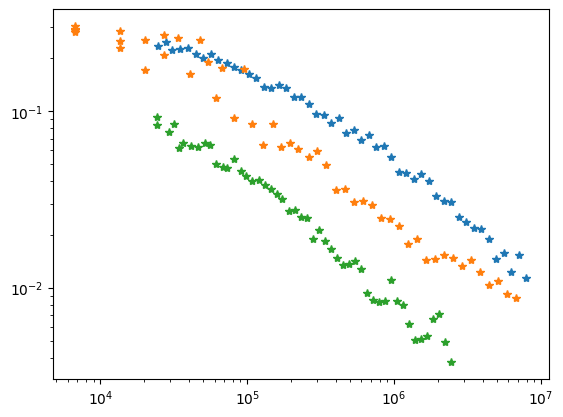

In [ ]:
#%%

plt.loglog(MLP_sizes, MLP_losses, "*")
plt.loglog(CNN3_sizes, CNN3_losses, "*")
plt.loglog(CNN14_sizes, CNN14_losses, "*")

m:  -0.6681418873042348
c:  4.457738095020605
m:  -0.5554907210635802
c:  3.98802930710763
m:  -0.5305638345135504
c:  4.263401730264069


<ipython-input-58-dbb93acc15f9>:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m, c = np.linalg.lstsq(A, ylog)[0]


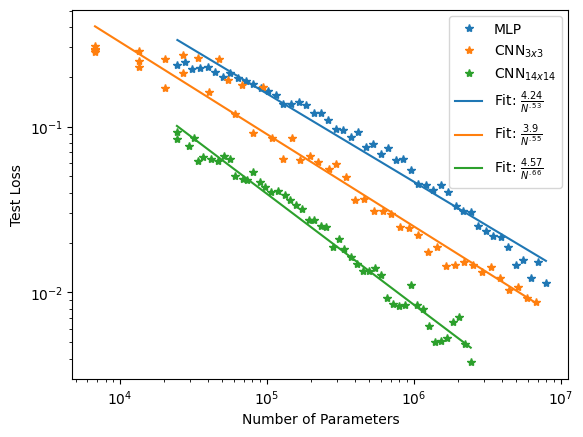

In [ ]:
CNN14fitx, CNN14fity = power_fit(CNN14_sizes, CNN14_losses)
CNN3fitx, CNN3fity = power_fit(CNN3_sizes, CNN3_losses)
MLPfitx, MLPfity = power_fit(MLP_sizes, MLP_losses)
plt.loglog(MLP_sizes, MLP_losses, "*")
plt.loglog(CNN3_sizes, CNN3_losses, "*")
plt.loglog(CNN14_sizes, CNN14_losses, "*")
plt.loglog(MLPfitx, MLPfity, color = 'tab:blue')
plt.loglog(CNN3fitx, CNN3fity, color = 'tab:orange')
plt.loglog(CNN14fitx, CNN14fity, color = 'tab:green')
plt.xlabel("Number of Parameters")
plt.ylabel("Test Loss")
plt.legend(["MLP", "$\\text{CNN}_{3x3}$", "$\\text{CNN}_{14x14}$", "Fit: $\\frac{4.24}{N^{.53}} $", "Fit: $\\frac{3.9}{N^{.55}} $", "Fit: $\\frac{4.57}{N^{.66}} $"])
plt.show()

m:  -1.7907136022827186
c:  5.283460556635136


<ipython-input-58-dbb93acc15f9>:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m, c = np.linalg.lstsq(A, ylog)[0]


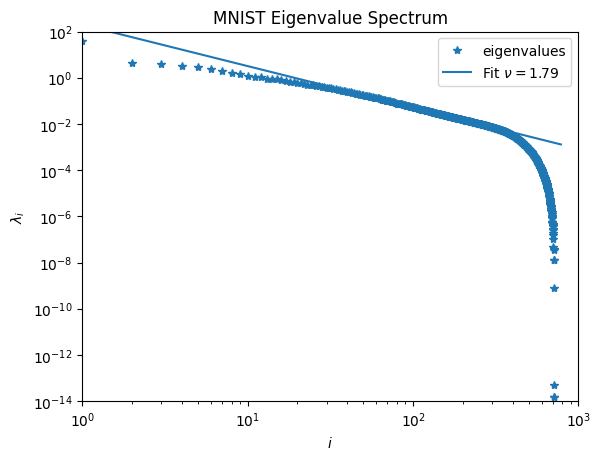

In [ ]:
Xtr = torch.stack([x[0].view((28*28,)) for x in train_data])
Ytr = torch.tensor([x[1] for x in train_data])
C = Xtr.transpose(-2, -1) @ Xtr / Xtr.shape[0]
eigvals = sorted(np.linalg.eigvalsh(C))[::-1]
ivals = range(1, len(eigvals)+1)
xfit, yfit = power_fit([i for i in ivals[40:-450]], eigvals[40:-450])

plt.loglog(ivals, eigvals, "*")
plt.loglog(ivals, [np.exp(5.28)*x**(-1.79) for x in ivals], color="tab:blue")
plt.xlim(1e0, 1e3)
plt.ylim(1e-14, 1e2)
plt.xlabel("$i$")
plt.ylabel("$\lambda_i$")
plt.title("MNIST Eigenvalue Spectrum")
plt.legend(["eigenvalues", "Fit $\\nu = 1.79$"])
plt.show()